<h1 style="text-align:center;">Optional Assignment for Quiz 1</h1>
<p>
    # Thakur, Nishant <br>
    # 1001-544-591 <br>
    # 2018-09-26 <br>
    # Assignment-optional-01 <br>
</p>

<h3>Chapter 4 </h3>
<p> E4.1 </p>

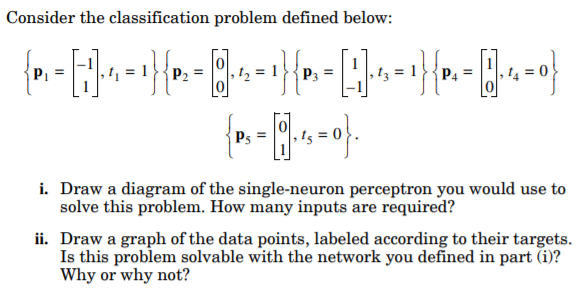

<b>Solution:<br> i.</b><br>
&nbsp;&nbsp;&nbsp;&nbsp;   Following is the diagram of the single-neuron perceptron with 2 inputs and 1 output which will be used to solve this problem. We require 2 inputs as the input vector has 2 values.


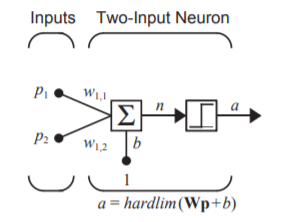

<b>ii. </b><br>


In [12]:
#%matplotlib notebook
%matplotlib inline
import numpy as np
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
from matplotlib import colors as c
import time

In [28]:
# Function to plot the graph with decission boundry.
def plot(weights, bias, points1, points2):
    fig = plt.figure()
    ax = fig.gca()
    resolution=100
    xs = np.linspace(-4., 4., resolution)
    ys = np.linspace(-4., 4., resolution)
    xx, yy = np.meshgrid(xs, ys)
    zz = weights[0] * xx + weights[1] * yy + bias
    zz[zz<0] =- 0
    zz[zz>0] =+ 1
    cMap = c.ListedColormap(['g','r'])
    quad = ax.pcolormesh(xs, ys, zz, cmap = cMap)
    p1 = points1.T
    p2 = points2.T
    ax.scatter(p1[0], p1[1], marker='^', color = 'k')
    ax.scatter(p2[0], p2[1], marker='o', color = 'b')
    black_patch = mpatches.Patch(color='black', label='Target = 1')
    blue_patch = mpatches.Patch(color='blue', label='Target = 0')
    plt.legend(handles=[black_patch, blue_patch])

    plt.show()

In [42]:
# Initialize the weights and bias randomly to begin training
weights = np.random.randint(-10, high = 10, size=(1, 2))[0]
bias = np.random.randn()

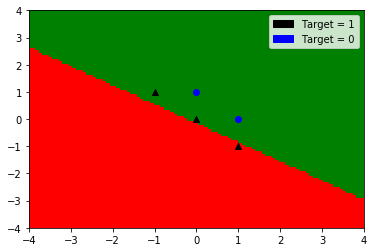

In [43]:
# Input points as given in the question
p1 = [-1, 1]
t1 = 1
p2 = [0, 0]
t2 = 1
p3 = [1, -1]
t3 = 1
p4 = [1, 0]
t4 = 0
p5= [0, 1]
t5 = 0
points1 = np.array([p1,p2,p3])
points2 = np.array([p4,p5])

plot(weights,bias, points1, points2)

In [44]:
# Activation function Symmetric Hardlimit
def activation(input_array,weights,bias):
    net_value = np.dot(weights, input_array.T) + bias
    return 1 if net_value >= 0 else 0

In [45]:
# Function to train the perceptron
# X : input to perceptron
# Y : the target output
# This function adjust the weights and bias for 100 steps using the learning rule.
def train(X, Y, weights, bias):
    for i in range(100):
        index = np.random.choice(X.shape[0], 1, replace=False)
        a = activation(X[index][0], weights, bias)
        e = Y[index] - a
        weights = weights + e * X[index]
        bias = bias + e
    plot(weights[0], bias, X[:len(points1)], X[len(points1):])

    return weights[0],bias

weights before training: [ -7 -10]
bias before training: -1.9437058421801032


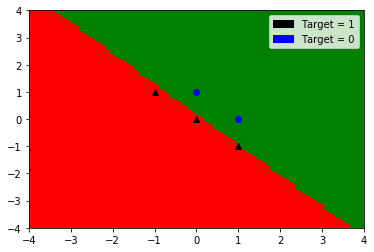

Updated weights after training: [-9 -8]
Updated bias after training: [1.05629416]


In [46]:
p = np.array([p1, p2, p3, p4, p5])
t = np.array([t1, t2, t3, t4, t5])

print("weights before training:", weights)
print("bias before training:", bias)
weights, bias = train(p, t, weights, bias)
print("Updated weights after training:", weights)
print("Updated bias after training:", bias)

<b>This problem can be solved using a single-neuron perceptron as it is linearly seperable. This can be verified by looking at the graph shown above.<b>

<br>
<br>
<h2> Chapter 5</h2>

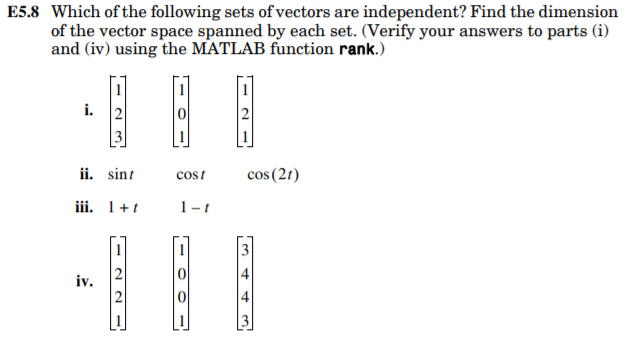